## Airsoft Target Detection

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from skimage import io


def show_image(img, cmap=None, name=None, size=None):
    if size is not None:
        plt.figure(figsize=size)
    else:
        plt.figure(figsize=(3,3))
    if cmap is not None:
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(img)
    plt.axis('off')
    if name is not None:
        plt.title(name)
    plt.show()





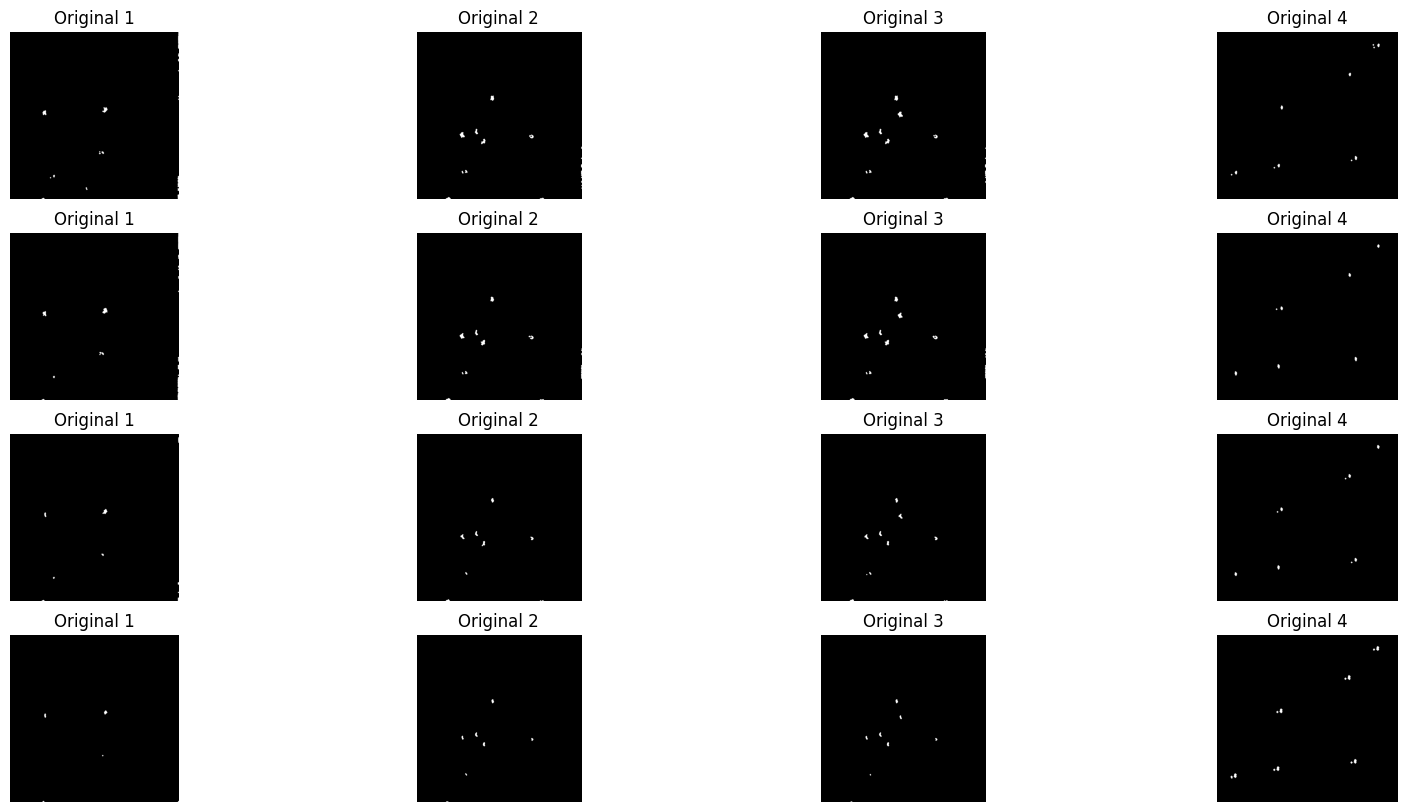

In [152]:
boundaries = [
	([0, 0, 0], [220, 88, 50]),
	([0, 0, 0], [220, 80, 40]),
	([0, 0, 0], [220, 80, 30]),
	([0, 0, 0], [220, 80, 10])

    #,([103, 86, 65], [145, 133, 128])
]
kernel_erode = np.array([
            [0,0,0,1,1,1,0,0,0],
            [0,0,1,1,1,1,1,0,0],
            [0,1,1,1,1,1,1,1,0],
            [1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1],
            [0,1,1,1,1,1,1,1,0],
            [0,0,1,1,1,1,1,0,0],
            [0,0,0,1,1,1,0,0,0],
            ],dtype=np.uint8)
kernel_dilate = np.array([
                    [0,0,1,0,0],
                    [0,1,1,1,0],
                    [1,1,1,1,1],
                    [0,1,1,1,0],
                    [0,0,1,0,0]],dtype=np.uint8)
number_shot_images = 4
fig, axs = plt.subplots(len(boundaries), number_shot_images, figsize=(20, 10))
for i in range(1, number_shot_images+1):
	image = io.imread(f'resources/aligned/shot_{i}.jpg')
	x=0
	for (lower, upper) in boundaries:
		x=x+1
		# create NumPy arrays from the boundaries
		lower = np.array(lower, dtype = "uint8")
		upper = np.array(upper, dtype = "uint8")
		# find the colors within the specified boundaries and apply
		# the mask
		mask = cv2.inRange(image, lower, upper)
		output = cv2.bitwise_and(image, image, mask = mask)
		# show the images
		gray_image = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
		gray_image = cv2.inRange(gray_image, int(np.max(gray_image)-15), int(np.max(gray_image)))
		#gray_image = cv2.inRange(output, (20, 31, 4), (220, 88, 50))
		#gray_dialte= cv2.erode(gray_image,kernel_dilate,iterations=2)
		gray_dialte= cv2.dilate(gray_image,kernel_dilate,iterations=10)
		gray_dialte= cv2.erode(gray_dialte,kernel_dilate,iterations=5)
		#print(np.min(gray_dialte))
		#print(np.max(gray_dialte))
		axs[x-1, i-1].imshow(gray_dialte,cmap="gray")
		axs[x-1, i-1].set_title(f'Original {i}')
		axs[x-1, i-1].axis('off')
		#axs[1, i-1].imshow(output)
		#axs[1, i-1].set_title(f'Color')
		#axs[1, i-1].axis('off')
		#axs[2, i-1].imshow(gray_image,cmap="gray")
		#axs[2, i-1].set_title(f'Gray')
		#axs[2, i-1].axis('off')
		#axs[3, i-1].imshow(gray_dialte,cmap="gray")
		#axs[3, i-1].set_title(f'Gray dilate')
		#axs[3, i-1].axis('off')

399
26
221.0


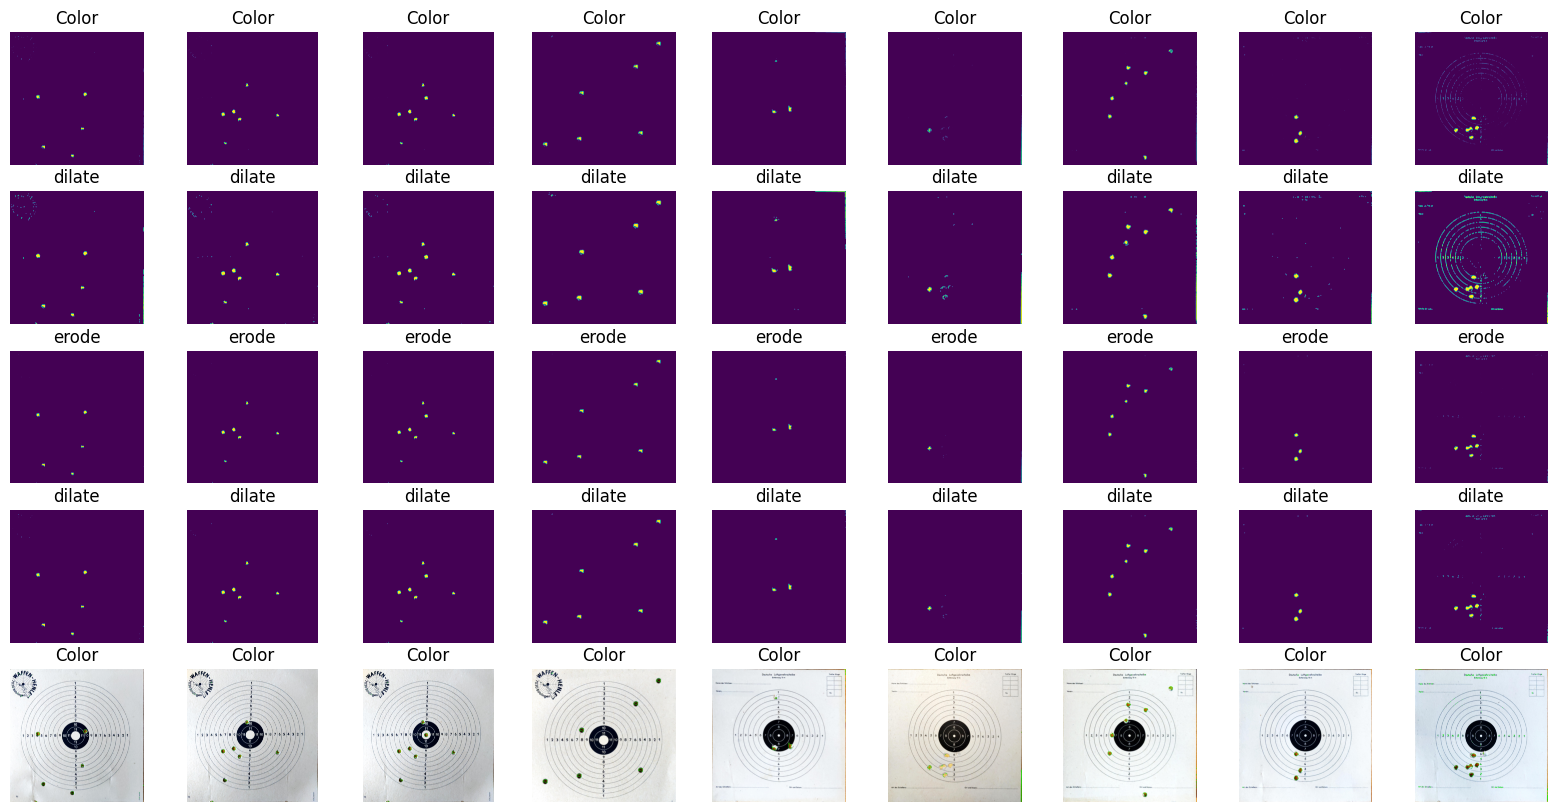

In [74]:
number_shot_images = 9
kernel_dilate = np.array([
                [0,0,0,1,1,1,0,0,0],
                [0,0,1,1,1,1,1,0,0],
                [0,1,1,1,1,1,1,1,0],
                [1,1,1,1,1,1,1,1,1],
                [1,1,1,1,1,1,1,1,1],
                [1,1,1,1,1,1,1,1,1],
                [0,1,1,1,1,1,1,1,0],
                [0,0,1,1,1,1,1,0,0],
                [0,0,0,1,1,1,0,0,0],
                ],dtype=np.uint8)
kernel_dilate = np.array([
                        [0,1,0],
                        [1,1,1],
                        [0,1,0]],dtype=np.uint8)
kernel_dilate2 = np.array([
                            [0,0,1,0,0],
                            [0,1,1,1,0],
                            [1,1,1,1,1],
                            [0,1,1,1,0],
                            [0,0,1,0,0]],dtype=np.uint8)
fig, axs = plt.subplots(5, number_shot_images, figsize=(20, 10))
avg =[]
for i in range(1, number_shot_images+1):
    image = io.imread(f'resources/aligned/shot_{i}.jpg')
    col,row,channel = image.shape
    img_copy1 = np.zeros((col,row))
    for r in range(5,row-5,1):
        for c in range(5,col-5,1):
            re,gr,bl = image[c,r]

            if(np.absolute(int(re)-int(gr))>25):
                avg.append(int(re)+int(gr)+int(bl))
                #gut
                img_copy1[c,r] =100
    axs[0, i-1].imshow(img_copy1)
    axs[0, i-1].set_title(f'Color')
    axs[0, i-1].axis('off')
    temp = img_copy1
    temp= cv2.dilate(temp,kernel_dilate,iterations=4)
    axs[1, i-1].imshow(temp)
    axs[1, i-1].set_title(f'dilate')
    axs[1, i-1].axis('off')
    temp= cv2.erode(temp,kernel_dilate,iterations=6)
    axs[2, i-1].imshow(temp)
    axs[2, i-1].set_title(f'erode')
    axs[2, i-1].axis('off')
    temp= cv2.dilate(temp,kernel_dilate,iterations=2)
    #show_image(temp,size=(7,7),cmap="gray")
    axs[3, i-1].imshow(temp)
    axs[3, i-1].set_title(f'dilate')
    axs[3, i-1].axis('off')
    ret, temp2 = cv2.threshold(temp, 50, 255, cv2.THRESH_BINARY)
    temp2 = temp2.astype(np.uint8)
    contours, hierarchy = cv2.findContours(temp2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    image2 = image.copy()
    cv2.drawContours(image2, contours, -1, (0,255,0), 3)
    #for contour in contours:
    #    (x,y),radius = cv2.minEnclosingCircle(contour)
    #    center = (int(x),int(y))
    #    radius = int(radius)
    #    cv2.circle(image2,center,radius,(0,255,0),2)
    #    # labelling the circles around the centers, in no particular order.
    #    position = (center[0] - 10, center[1] + 10)
    #    text_color = (0, 0, 255)
    #    cv2.putText(image2, str(i + 1), position, cv2.FONT_HERSHEY_SIMPLEX, 1, text_color, 3)
    axs[4, i-1].imshow(image2)
    axs[4, i-1].set_title(f'Color')
    axs[4, i-1].axis('off')

    #show_image(image2,size=(7,7))
print(np.max(avg))
print(np.min(avg))
print(np.median(avg))

17
34
45
22
10
28
8
10
20


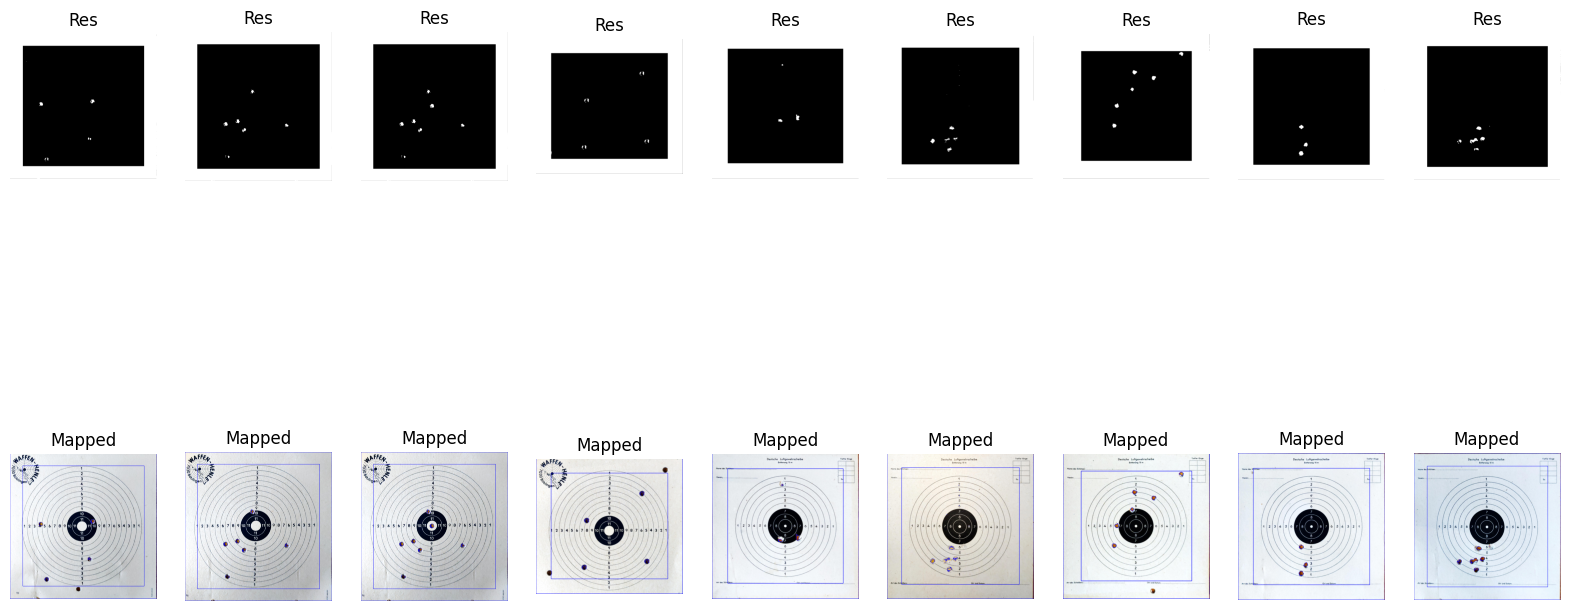

In [74]:

number_shot_images = 9

fig, axs = plt.subplots(2, number_shot_images, figsize=(20, 10))
avg =[]
for i in range(1, number_shot_images+1):
    img = io.imread(f'resources/aligned/shot_{i}.jpg')

    #convert the BGR image to HSV colour space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    #set the lower and upper bounds for the green hue
    lower_green = np.array([80,120,40])
    upper_green = np.array([255,255,255])

    #create a mask for green colour using inRange function
    mask = cv2.inRange(hsv, lower_green, upper_green)

    #perform bitwise and on the original image arrays using the mask
    res = cv2.bitwise_and(img, img, mask=mask)
    kernel_dilate2 = np.array([
                                [0,0,1,0,0],
                                [0,1,1,1,0],
                                [1,1,1,1,1],
                                [0,1,1,1,0],
                                [0,0,1,0,0]],dtype=np.uint8)
    res= cv2.erode(res,kernel_dilate2,iterations=1)
    res= cv2.dilate(res,kernel_dilate2,iterations=1)
    res = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
    row,col = res.shape
    ret, res = cv2.threshold(res, 20, 255, cv2.THRESH_BINARY)
    res = res.astype(np.uint8)
    offset = 100
    res[0:offset, 0:-1] =255
    res[0:-1, 0:offset] =255
    res[row-offset:-1, 0:-1] =255
    res[0:-1, col-offset:-1] =255
    axs[0, i-1].imshow(res,cmap="gray")
    axs[0, i-1].set_title(f'Res')
    axs[0, i-1].axis('off')
    contours, hierarchy = cv2.findContours(res, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print(len(contours))
    image2 = img.copy()
    cv2.drawContours(image2, contours, -1, (0,0,255), 3)
    #display the images
    axs[1, i-1].imshow(image2)
    axs[1, i-1].set_title(f'Mapped')
    axs[1, i-1].axis('off')


424


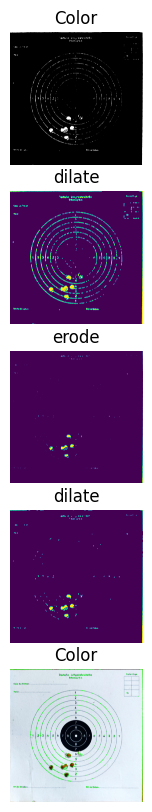

In [65]:
number_shot_images = 9
kernel_dilate = np.array([
                [0,0,0,1,1,1,0,0,0],
                [0,0,1,1,1,1,1,0,0],
                [0,1,1,1,1,1,1,1,0],
                [1,1,1,1,1,1,1,1,1],
                [1,1,1,1,1,1,1,1,1],
                [1,1,1,1,1,1,1,1,1],
                [0,1,1,1,1,1,1,1,0],
                [0,0,1,1,1,1,1,0,0],
                [0,0,0,1,1,1,0,0,0],
                ],dtype=np.uint8)
kernel_dilate = np.array([
                        [0,1,0],
                        [1,1,1],
                        [0,1,0]],dtype=np.uint8)
kernel_dilate2 = np.array([
                            [0,0,1,0,0],
                            [0,1,1,1,0],
                            [1,1,1,1,1],
                            [0,1,1,1,0],
                            [0,0,1,0,0]],dtype=np.uint8)
fig, axs = plt.subplots(5, 1, figsize=(20, 10))
for i in range(9, number_shot_images+1):
    image = io.imread(f'resources/aligned/shot_{i}.jpg')
    col,row,channel = image.shape
    img_copy1 = np.zeros((col,row))
    for r in range(0,row,1):
        for c in range(0,col,1):
            re,gr,bl = image[c,r]

            if(np.absolute(int(re)-int(gr))>25):
                #gut
                img_copy1[c,r] =100
    axs[0].imshow(img_copy1,cmap="gray")
    axs[0].set_title(f'Color')
    axs[0].axis('off')
    temp = img_copy1
    temp= cv2.dilate(temp,kernel_dilate,iterations=4)
    axs[1].imshow(temp)
    axs[1].set_title(f'dilate')
    axs[1].axis('off')
    temp= cv2.erode(temp,kernel_dilate,iterations=8)
    axs[2].imshow(temp)
    axs[2].set_title(f'erode')
    axs[2].axis('off')
    temp= cv2.dilate(temp,kernel_dilate,iterations=4)
    #show_image(temp,size=(7,7),cmap="gray")
    axs[3].imshow(temp)
    axs[3].set_title(f'dilate')
    axs[3].axis('off')
    #ret, temp2 = cv2.threshold(temp, 50, 255, cv2.THRESH_BINARY)
    temp2 = temp2.astype(np.uint8)
    contours, hierarchy = cv2.findContours(temp2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    image2 = image.copy()
    print(len(contours))
    cv2.drawContours(image2, contours, -1, (0,255,0), 3)
    #for contour in contours:
    #    (x,y),radius = cv2.minEnclosingCircle(contour)
    #    center = (int(x),int(y))
    #    radius = int(radius)
    #    cv2.circle(image2,center,radius,(0,255,0),2)
    #    # labelling the circles around the centers, in no particular order.
    #    position = (center[0] - 10, center[1] + 10)
    #    text_color = (0, 0, 255)
    #    cv2.putText(image2, str(i + 1), position, cv2.FONT_HERSHEY_SIMPLEX, 1, text_color, 3)
    axs[4].imshow(image2)
    axs[4].set_title(f'Color')
    axs[4].axis('off')
    #show_image(image2,size=(7,7))

(2273, 2291, 3)


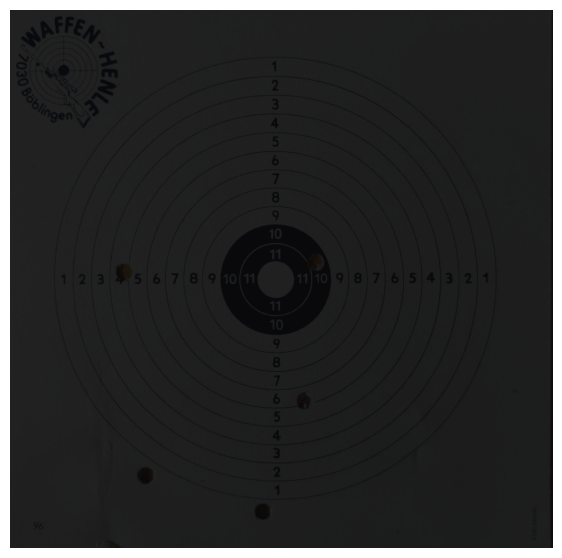

In [4]:
image = io.imread(f'resources/aligned/shot_1.jpg')
col,row,channel = image.shape
print(image.shape)
#img_copy = np.zeros((col,row))
img_copy1 = image.copy()
#img_copy2 = np.zeros((col,row))
#img_copy3 = np.zeros((col,row))
for r in range(0,row,1):
    for c in range(0,col,1):
        re,gr,bl = image[c,r]
        y=10
        k=0.1
        img_copy1[c,r] =(((re-y)*k)+y,((gr-y)*k)+y,((bl-y)*k)+y)
        #if(np.absolute(int(re)-int(gr))+np.absolute(int(re)-int(bl))+np.absolute(int(bl)-int(gr))>80):
        #    img_copy[c,r] =100
        #if(np.absolute(int(re)-int(gr))>20):
            #gut
        #    img_copy1[c,r] =100
        #if(np.absolute(int(re)-int(bl))>40):
        #    img_copy2[c,r] =100
        #if(np.absolute(int(bl)-int(gr))>40):
        #    img_copy3[c,r] =100
#show_image(image,size=(7,7))
#show_image(img_copy,size=(7,7),cmap="gray")


show_image(img_copy1,size=(7,7))
#show_image(img_copy2,size=(7,7),cmap="gray")
#show_image(img_copy3,size=(7,7),cmap="gray")

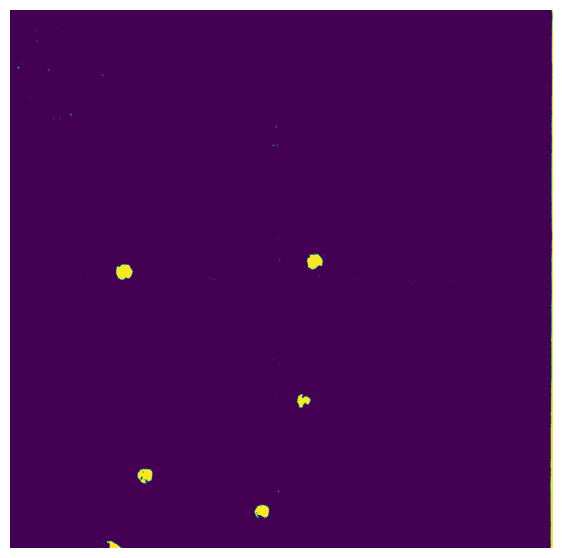

[[  0   0   0 ...  85 102 102]
 [  0  10  10 ...  85 102 102]
 [  0   9   0 ...  85 102 102]
 ...
 [  0   0   0 ... 140 140 140]
 [  0   0   0 ... 140 140 140]
 [  0   8   0 ... 140 140 140]]


In [19]:
img_copy2=img_copy1.copy()
hsv = cv2.cvtColor(img_copy2, cv2.COLOR_BGR2HSV_FULL)
h,s,v = cv2.split(hsv)
col,row,channel = img_copy2.shape
img_copy3 = np.zeros((col,row))
for r in range(0,row,1):
    for c in range(0,col,1):
        hue = h[c,r]
        sat = s[c,r]
        if hue>60 and sat> 40:
            img_copy3[c,r] =100
show_image(img_copy3,size=(7,7))

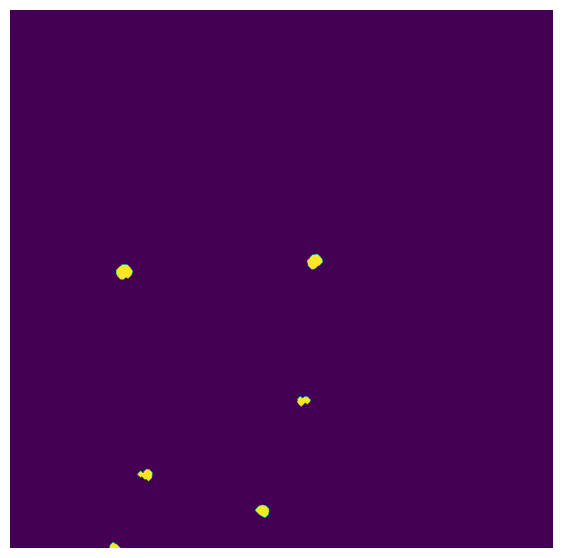

In [20]:
img_copy4=img_copy3.copy()
kernel_dilate = np.array([
            [0,0,0,1,1,1,0,0,0],
            [0,0,1,1,1,1,1,0,0],
            [0,1,1,1,1,1,1,1,0],
            [1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1],
            [0,1,1,1,1,1,1,1,0],
            [0,0,1,1,1,1,1,0,0],
            [0,0,0,1,1,1,0,0,0],
            ],dtype=np.uint8)
kernel_dilate = np.array([
                    [0,1,0],
                    [1,1,1],
                    [0,1,0]],dtype=np.uint8)
kernel_dilate2 = np.array([
                        [0,0,1,0,0],
                        [0,1,1,1,0],
                        [1,1,1,1,1],
                        [0,1,1,1,0],
                        [0,0,1,0,0]],dtype=np.uint8)
img_copy4= cv2.erode(img_copy4,kernel_dilate2,iterations=6)
img_copy4= cv2.dilate(img_copy4,kernel_dilate2,iterations=6)
show_image(img_copy4,size=(7,7))

6
6
7
6
0
1
1
1
5


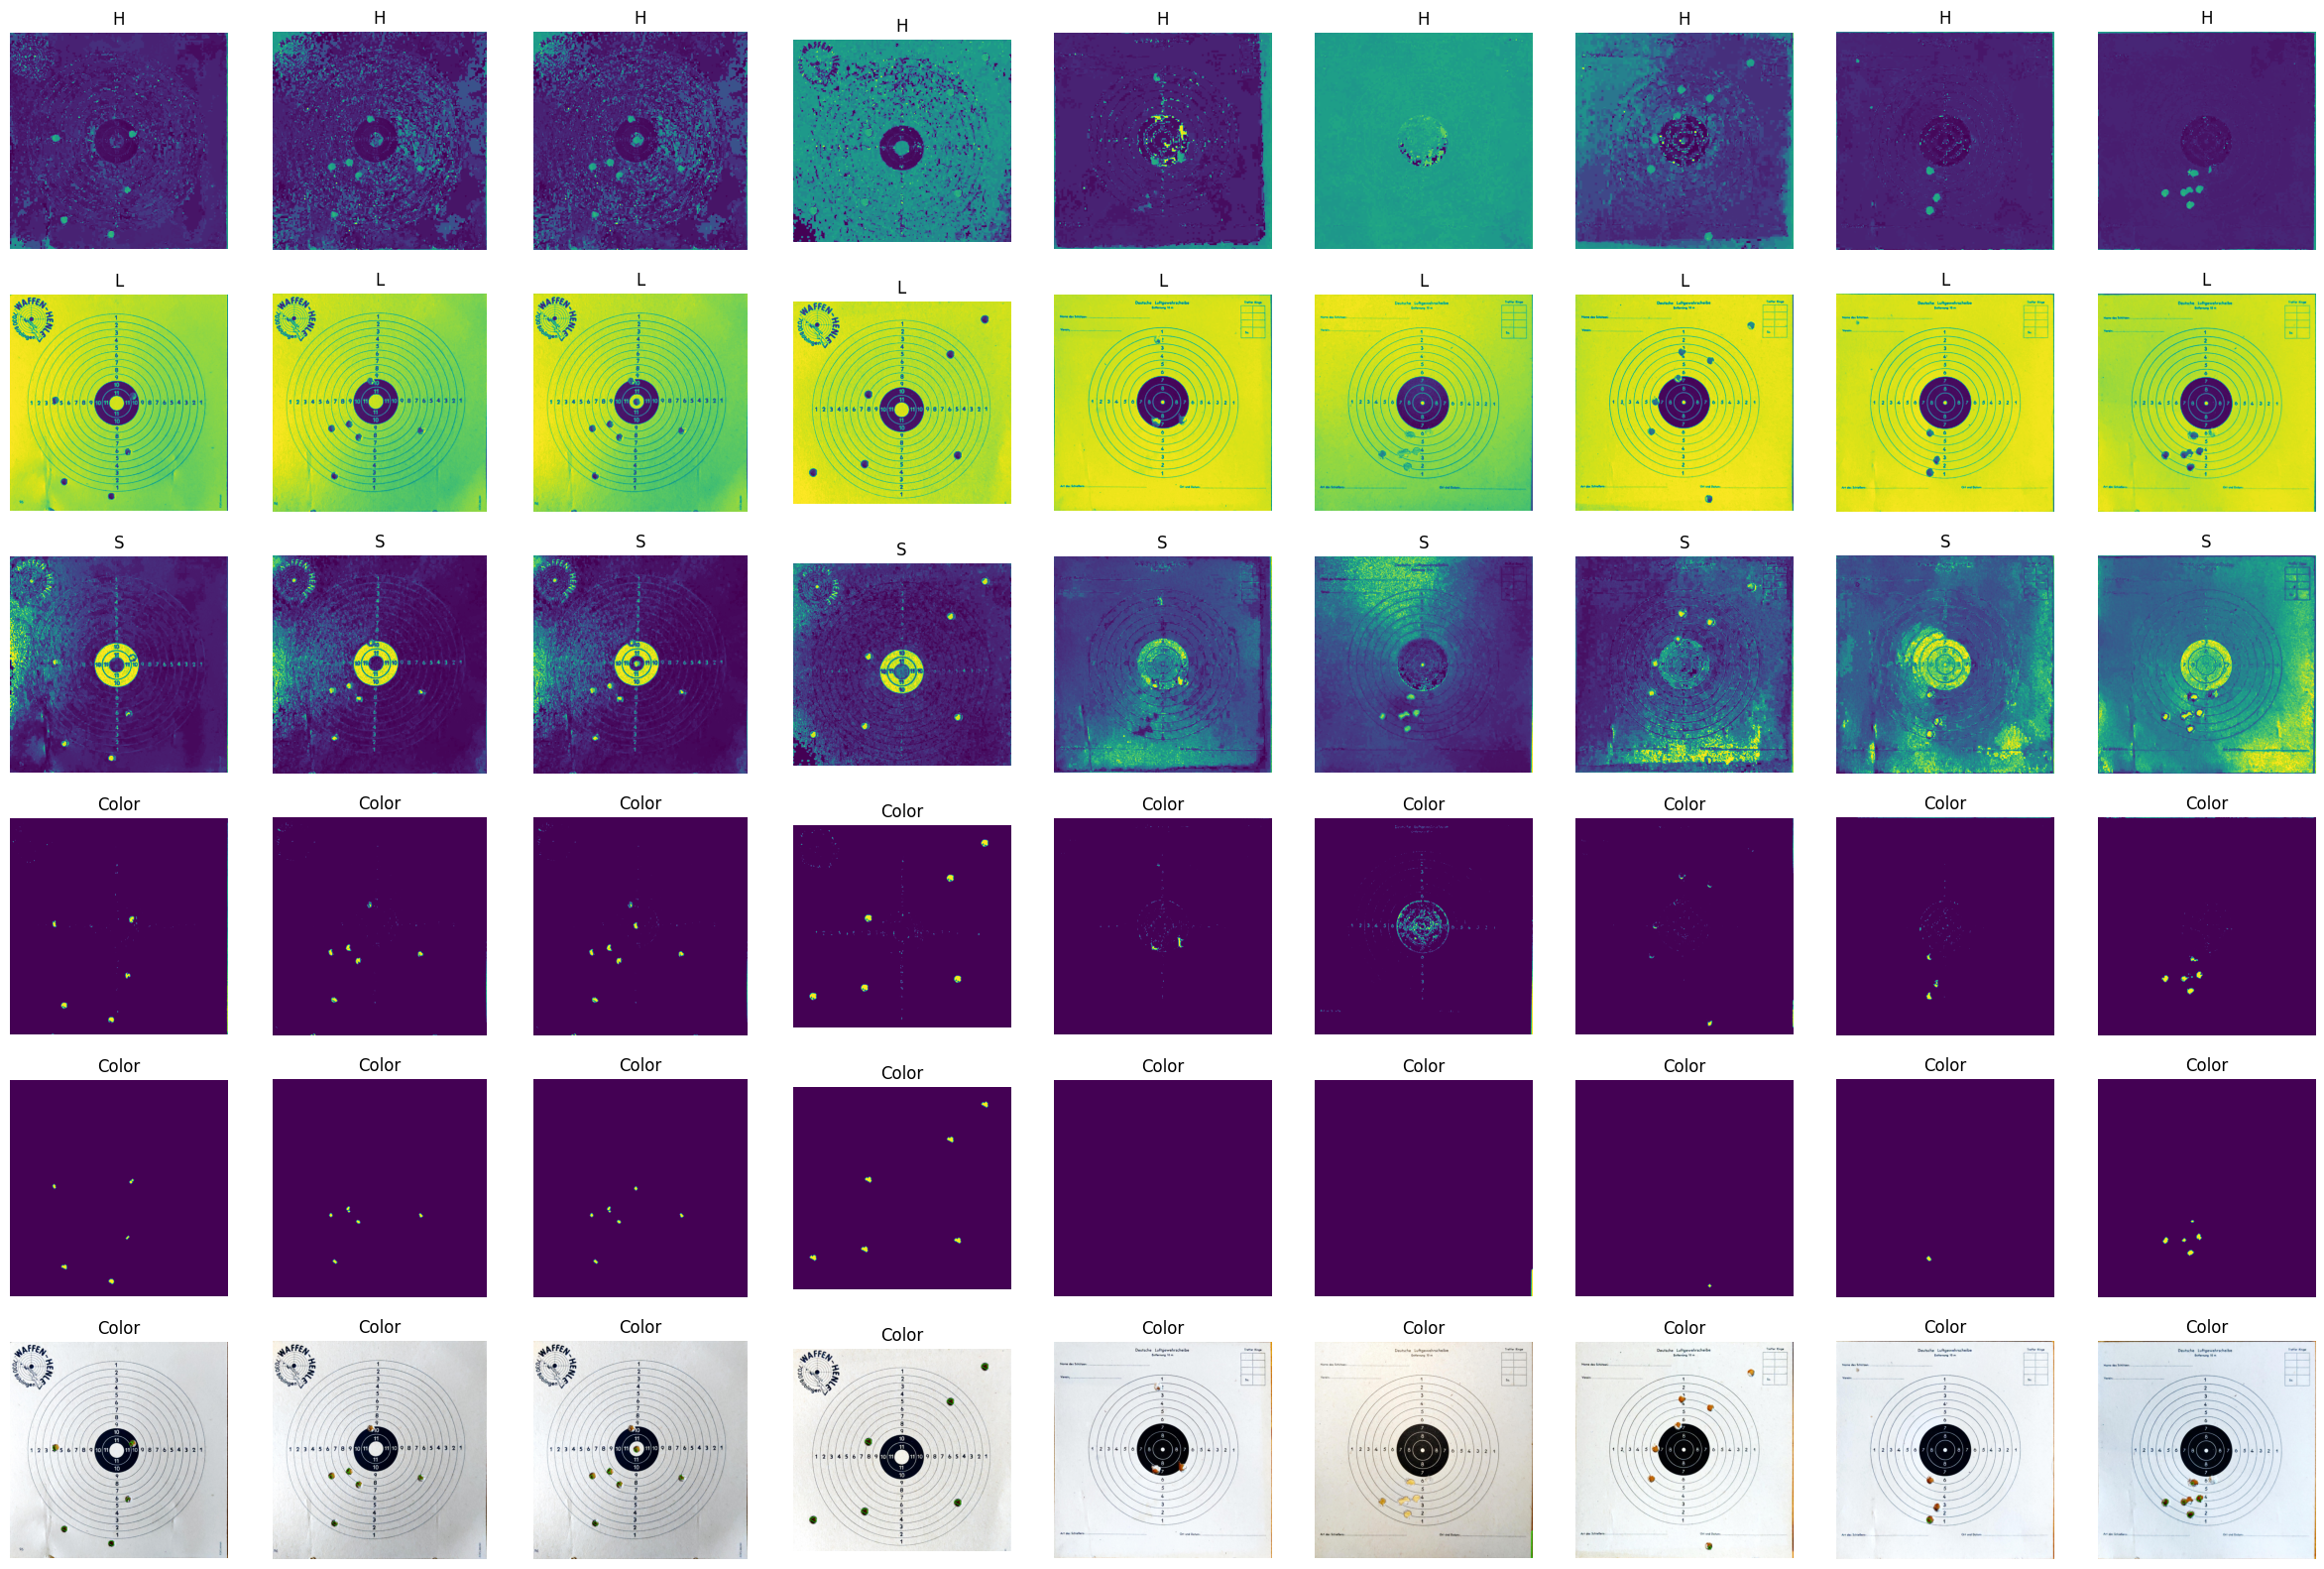

In [39]:
number_shot_images = 9
kernel_dilate = np.array([
                [0,0,0,1,1,1,0,0,0],
                [0,0,1,1,1,1,1,0,0],
                [0,1,1,1,1,1,1,1,0],
                [1,1,1,1,1,1,1,1,1],
                [1,1,1,1,1,1,1,1,1],
                [1,1,1,1,1,1,1,1,1],
                [0,1,1,1,1,1,1,1,0],
                [0,0,1,1,1,1,1,0,0],
                [0,0,0,1,1,1,0,0,0],
                ],dtype=np.uint8)
kernel_dilate = np.array([
                        [0,1,0],
                        [1,1,1],
                        [0,1,0]],dtype=np.uint8)
kernel_dilate2 = np.array([
                            [0,0,1,0,0],
                            [0,1,1,1,0],
                            [1,1,1,1,1],
                            [0,1,1,1,0],
                            [0,0,1,0,0]],dtype=np.uint8)


col,row,channel = img_copy2.shape
fig, axs = plt.subplots(6, number_shot_images, figsize=(30, 20))

for i in range(1, number_shot_images+1):
    image = io.imread(f'resources/aligned/shot_{i}.jpg')
    hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    h,l,s = cv2.split(hls)
    col,row = h.shape
    img_copy1 = np.zeros((col,row))
    axs[0, i-1].imshow(h)
    axs[0, i-1].set_title(f'H')
    axs[0, i-1].axis('off')
    axs[1, i-1].imshow(l)
    axs[1, i-1].set_title(f'L')
    axs[1, i-1].axis('off')
    axs[2, i-1].imshow(s)
    axs[2, i-1].set_title(f'S')
    axs[2, i-1].axis('off')
    for r in range(0,row,1):
        for c in range(0,col,1):
            hue = h[c,r]
            sat = s[c,r]
            lum = l[c,r]
            if hue>50 and sat> 50 and lum>10 and lum<80:
                img_copy1[c,r] =100
    temp = img_copy1
    axs[3, i-1].imshow(img_copy1)
    axs[3, i-1].set_title(f'Color')
    axs[3, i-1].axis('off')
    
    temp= cv2.erode(temp,kernel_dilate2,iterations=6)
    temp= cv2.dilate(temp,kernel_dilate2,iterations=6)
    ret, temp2 = cv2.threshold(temp, 50, 255, cv2.THRESH_BINARY)
    axs[4, i-1].imshow(temp2)
    axs[4, i-1].set_title(f'Color')
    axs[4, i-1].axis('off')
    temp2 = temp2.astype(np.uint8)
    contours, hierarchy = cv2.findContours(temp2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    image2 = image.copy()
    
    print(len(contours))
    cv2.drawContours(image2, contours, -1, (0,255,0), 3)
    axs[5, i-1].imshow(image2)
    axs[5, i-1].set_title(f'Color')
    axs[5, i-1].axis('off')


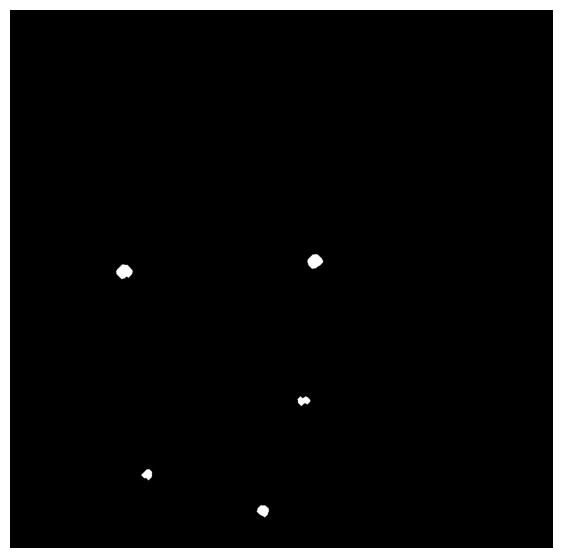

In [154]:
temp = img_copy1
kernel_dilate = np.array([
            [0,0,0,1,1,1,0,0,0],
            [0,0,1,1,1,1,1,0,0],
            [0,1,1,1,1,1,1,1,0],
            [1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1],
            [0,1,1,1,1,1,1,1,0],
            [0,0,1,1,1,1,1,0,0],
            [0,0,0,1,1,1,0,0,0],
            ],dtype=np.uint8)
kernel_dilate = np.array([
                    [0,1,0],
                    [1,1,1],
                    [0,1,0]],dtype=np.uint8)
kernel_dilate2 = np.array([
                        [0,0,1,0,0],
                        [0,1,1,1,0],
                        [1,1,1,1,1],
                        [0,1,1,1,0],
                        [0,0,1,0,0]],dtype=np.uint8)
#temp= cv2.dilate(temp,kernel_dilate2,iterations=2)
temp= cv2.erode(temp,kernel_dilate2,iterations=6)
temp= cv2.dilate(temp,kernel_dilate2,iterations=6)
show_image(temp,size=(7,7),cmap="gray")

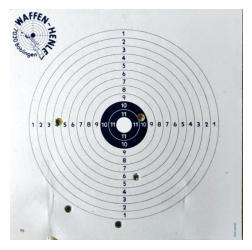

In [162]:

ret, temp2 = cv2.threshold(temp, 50, 255, cv2.THRESH_BINARY)
temp2 = temp2.astype(np.uint8)
contours, hierarchy = cv2.findContours(temp2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image2 = image.copy()
for contour in contours:
    (x,y),radius = cv2.minEnclosingCircle(contour)
    center = (int(x),int(y))
    radius = int(radius)
    cv2.circle(image2,center,radius,(0,255,0),2)
    # labelling the circles around the centers, in no particular order.
    position = (center[0] - 10, center[1] + 10)
    text_color = (0, 0, 255)
    cv2.putText(image2, str(i + 1), position, cv2.FONT_HERSHEY_SIMPLEX, 1, text_color, 3)
show_image(image2)

In [ ]:

image = io.imread('resources/aligned/shot_1.jpg')
templates = []
for i in range(1, 6):
    template = cv2.cvtColor(
        io.imread(f'resources/holes/Loch{1}.jpg'), cv2.COLOR_BGR2GRAY)
    templates.append(template)
# Load the template and target images
template = templates[2]
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
target = gray_image

# Create a SIFT object and detect keypoints and descriptors in the template and target images
sift = cv2.xfeatures2d.SURF_create()
kp1, des1 = sift.detectAndCompute(template, None)
kp2, des2 = sift.detectAndCompute(target, None)

# Create a FLANN-based matcher object and match the descriptors between the template and target images
matcher = cv2.FlannBasedMatcher()
matches = matcher.knnMatch(des1, des2, k=2)


print(len(matches))
# Apply ratio test to filter out false matches
good_matches = []
for m, n in matches:
    good_matches.append(m)
print(len(good_matches))
# Draw the matched keypoints on the target image
matched_img = cv2.drawMatches(template, kp1, target, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
show_image(matched_img, size=(7, 7))

error: OpenCV(4.7.0) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1026: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


(1, 3)
[[[110   0   0]
  [108   0   0]
  [108   0   0]
  ...
  [122   0   0]
  [118   0   0]
  [115   0   0]]

 [[164   0   0]
  [160   0   0]
  [152   0   0]
  ...
  [122   0   0]
  [118   0   0]
  [114   0   0]]

 [[200   0   0]
  [196   0   0]
  [188   0   0]
  ...
  [122   0   0]
  [118   0   0]
  [115   0   0]]

 ...

 [[226   0   0]
  [227   0   0]
  [227   0   0]
  ...
  [114   0   0]
  [116   0   0]
  [117   0   0]]

 [[226   0   0]
  [226   0   0]
  [226   0   0]
  ...
  [112   0   0]
  [113   0   0]
  [114   0   0]]

 [[220   0   0]
  [222   0   0]
  [222   0   0]
  ...
  [114   0   0]
  [114   0   0]
  [115   0   0]]]
[[[  0 108   0]
  [  0 108   0]
  [  0 107   0]
  ...
  [  0  84   0]
  [  0  74   0]
  [  0  70   0]]

 [[  0 164   0]
  [  0 159   0]
  [  0 152   0]
  ...
  [  0  84   0]
  [  0  74   0]
  [  0  70   0]]

 [[  0 200   0]
  [  0 196   0]
  [  0 188   0]
  ...
  [  0  84   0]
  [  0  74   0]
  [  0  70   0]]

 ...

 [[  0 228   0]
  [  0 228   0]
  [  0 228   

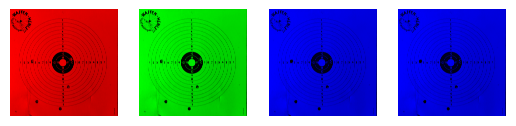

(1, 3)


True

In [ ]:
im = io.imread('resources/aligned/shot_1.jpg')
image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# Convolve with [0.5, 0, 0.5] to set each pixel to average of its left and right neighbours
kernel = np.array([0.5, 0, 0.5], dtype=float).reshape(1,-1)
print(kernel.shape)
cv2.imwrite('DEBUG-test.png', im)
convolved = cv2.filter2D(im, ddepth=-1, kernel=kernel, borderType=cv2.BORDER_REPLICATE)
test = cv2.Laplacian(im,ddepth=-1, borderType=cv2.BORDER_REPLICATE)
cv2.imwrite('DEBUG-convolved.png', convolved)
img1 = convolved
figure, plots = plt.subplots(ncols=4, nrows=1)
for i, subplot in zip(range(3), plots):
    temp = np.zeros(img1.shape, dtype='uint8')
    temp[:,:,i] = img1[:,:,i]
    subplot.imshow(temp)
    subplot.set_axis_off()
    print(temp)
temp = np.zeros(img1.shape, dtype='uint8')
temp[:,:,i] = img1[:,:,i]
plots[3].imshow(temp)
plots[3].set_axis_off()
plt.show()

# Make mask of black pixels, True where black
blackMask = np.all(im==0, axis=-1)
cv2.imwrite('DEBUG-blackMask.png', (blackMask*255).astype(np.uint8))

# Convolve with [0.5, 0, 0.5] to set each pixel to average of its left and right neighbours
kernel = np.array([0.5, 0, 0.5], dtype=float).reshape(1,-1)
print(kernel.shape)
convolved = cv2.filter2D(im, ddepth=-1, kernel=kernel, borderType=cv2.BORDER_REPLICATE)
cv2.imwrite('DEBUG-convolved.png', convolved)

# Choose either convolved or original image at each pixel
res = np.where(blackMask[...,None], convolved, im)
cv2.imwrite('result.png', res)

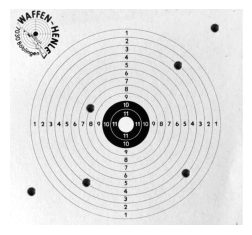

In [ ]:
image = io.imread(f'resources/aligned/shot_{i}.jpg')
img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
show_image(img, cmap="gray")

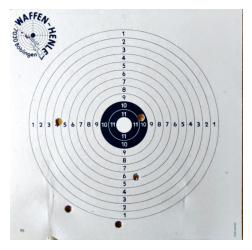

error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/morph.simd.hpp:649: error: (-215:Assertion failed) _kernel.type() == CV_8U in function 'MorphFilter'


In [ ]:
img = io.imread(f'resources/aligned/shot_1.jpg')

img_thresholded = cv2.inRange(img, (20, 20, 20), (80, 80, 80))
show_image(img)
opening = cv2.morphologyEx(img_thresholded, cv2.MORPH_OPEN, kernel)
print(opening)
contours, hierarchy = cv2.findContours(opening.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print(len(contours))

for contour in contours:
    (x,y),radius = cv2.minEnclosingCircle(contour)
    center = (int(x),int(y))
    radius = int(radius)
    cv2.circle(img,center,radius,(0,255,0),2)
    # labelling the circles around the centers, in no particular order.
    position = (center[0] - 10, center[1] + 10)
    text_color = (0, 0, 255)
    cv2.putText(img, str(i + 1), position, cv2.FONT_HERSHEY_SIMPLEX, 1, text_color, 3)
show_image(img)

5
11
11
10


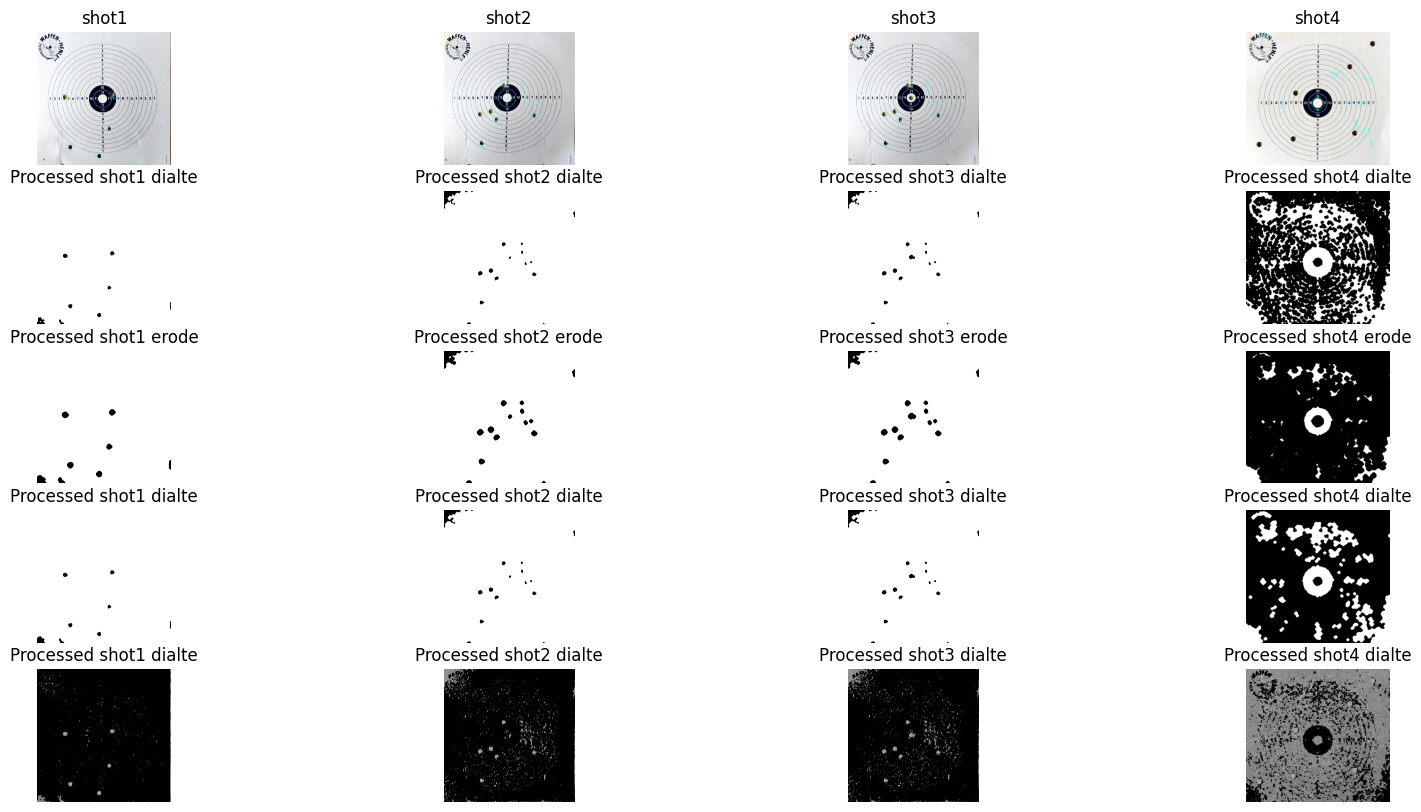

In [ ]:
# Create figure with subplots
number_shot_images = 4
fig, axs = plt.subplots(5, number_shot_images, figsize=(20, 10))
for i in range(1, number_shot_images+1):
    # Load image and apply processing
    image = io.imread(f'resources/aligned/shot_{i}.jpg')
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HLS_FULL)
    h,s,v = cv2.split(hsv)
    kernel_erode = np.array([
            [0,0,0,1,1,1,0,0,0],
            [0,0,1,1,1,1,1,0,0],
            [0,1,1,1,1,1,1,1,0],
            [1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1],
            [0,1,1,1,1,1,1,1,0],
            [0,0,1,1,1,1,1,0,0],
            [0,0,0,1,1,1,0,0,0],
            ],dtype=np.uint8)
    kernel_dilate = np.array([
                        [0,0,1,0,0],
                        [0,1,1,1,0],
                        [1,1,1,1,1],
                        [0,1,1,1,0],
                        [0,0,1,0,0]],dtype=np.uint8)
    h = cv2.blur(h, (8,8))
    (thresh, h)= cv2.threshold(h, 100, 200, cv2.THRESH_TOZERO)
    axs[4, i-1].imshow(h, cmap='gray')
    axs[4, i-1].set_title(f'Processed shot{i} dialte')
    axs[4, i-1].axis('off')
    #show_image(h, cmap='gray', size=(7,7))
    h = cv2.inRange(h, 0, 90)

    h = cv2.dilate(h,kernel_erode,iterations=4)
    h = cv2.erode(h,kernel_erode,iterations=4)
    axs[1, i-1].imshow(h, cmap='gray')
    axs[1, i-1].set_title(f'Processed shot{i} dialte')
    axs[1, i-1].axis('off')
    # Display processed image in second row

    #show_image(h, cmap='gray', size=(7,7))
    h = cv2.erode(h,kernel_erode,iterations=5)
    axs[2, i-1].imshow(h, cmap='gray')
    axs[2, i-1].set_title(f'Processed shot{i} erode')
    axs[2, i-1].axis('off')
    #show_image(h, cmap='gray', size=(7,7))
    contours, hierarchy = cv2.findContours(h, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    biggest_cntr = None
    biggest_radius = 0
    found =[]
    marked = image.copy()
    for contour in contours:
        radius = cv2.minEnclosingCircle(contour)[1]
        if(radius>40 and radius<100):
                found.append(contour)
                cv2.drawContours(marked, [contour], -1, (0, 255, 255), 3)

    print(len(found))
    h = cv2.dilate(h,kernel_erode,iterations=5)
    #show_image(h, cmap='gray', size=(7,7))
    axs[0, i-1].imshow(marked)
    axs[0, i-1].set_title(f'shot{i}')
    axs[0, i-1].axis('off')
    # Display processed image in second row
    axs[3, i-1].imshow(h, cmap='gray')
    axs[3, i-1].set_title(f'Processed shot{i} dialte')
    axs[3, i-1].axis('off')

96
92
94
55


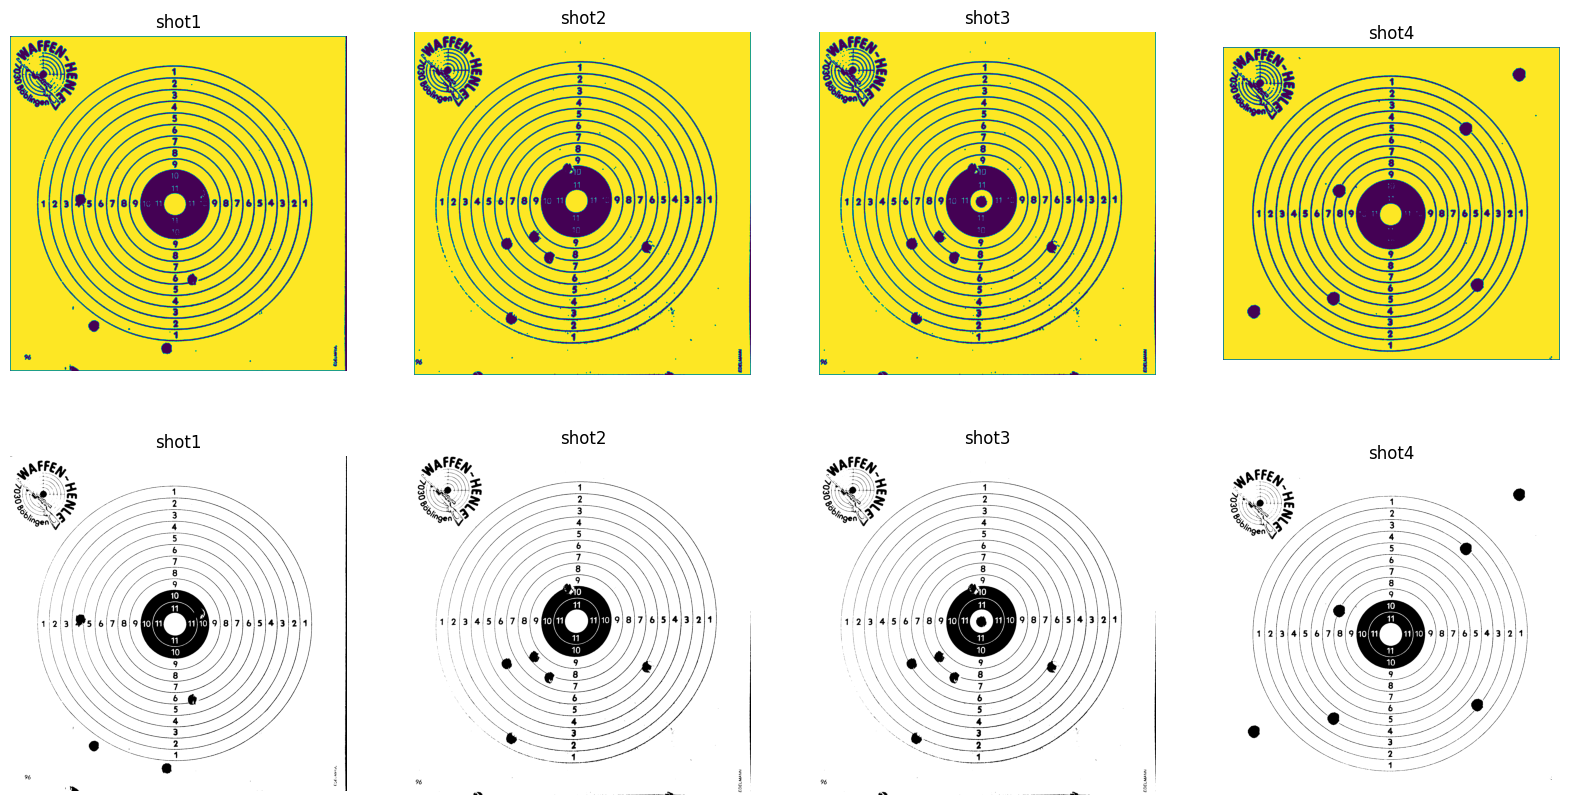

In [ ]:
# Create figure with subplots
number_shot_images = 4
fig, axs = plt.subplots(2, number_shot_images, figsize=(20, 10))
for i in range(1, number_shot_images+1):
    image = io.imread(f'resources/aligned/shot_{i}.jpg')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    (thresh, gray_image)= cv2.threshold(gray_image, 150, 200, cv2.THRESH_BINARY)
    # Load image and apply processing
    marked = gray_image.copy()
    found =[]
    contours, hierarchy = cv2.findContours(gray_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        radius = cv2.minEnclosingCircle(contour)[1]
        cv2.drawContours(marked, [contour], -1, (0, 255, 255), 3)
        if(radius>20 and radius<60):
                found.append(contour)
    print(len(found))
    axs[0, i-1].imshow(marked)
    axs[0, i-1].set_title(f'shot{i}')
    axs[0, i-1].axis('off')
    axs[1, i-1].imshow(gray_image,cmap="gray")
    axs[1, i-1].set_title(f'shot{i}')
    axs[1, i-1].axis('off')


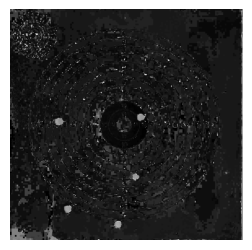

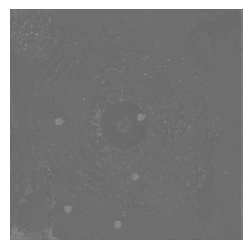

(2273, 2291)
(2273, 2291)


In [ ]:
   # Load image and apply processing
image = io.imread(f'resources/aligned/shot_1.jpg')

def filter1(img, filter, off):
    i_r, i_c = img.shape
    f_r, f_c = filter.shape
    ret = np.zeros((int(i_r / off),int(i_c / off)))

    f_r_h = f_r//2
    f_c_h = f_c//2

    for row in range(f_r_h, i_r - f_r_h, off):
        for col in range(f_c_h, i_c - f_c_h, off):
            part = img[row-f_r_h:row+f_r_h+1, col-f_c_h:col+f_c_h+1]
            ret[int(row / off), int(col / off)] = np.sum(part*fm)
    ret = ret - ret.min()
    ret = ret / ret.max()
    ret = ret * 255
    return ret

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)
show_image(h,cmap="gray")
kernel_erode = np.array([
            [0,0,0,1,1,1,0,0,0],
            [0,0,1,1,1,1,1,0,0],
            [0,1,1,1,1,1,1,1,0],
            [1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1],
            [0,1,1,1,1,1,1,1,0],
            [0,0,1,1,1,1,1,0,0],
            [0,0,0,1,1,1,0,0,0],
            ])
fm = np.array([
        [8, 1, 8],
        [1, 1, 1],
        [8, 1, 8]
    ])
h2 = filter1(h, fm,  1)
show_image(h2-h,cmap="gray")
print(h.shape)
print(h2.shape)

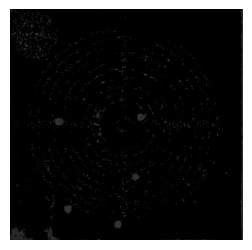

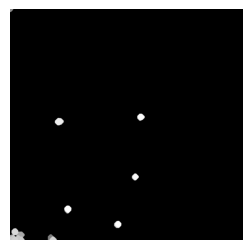

In [ ]:
temp = h2-h
(thresh, temp)= cv2.threshold(temp, 20, 255, cv2.THRESH_TOZERO)
show_image(temp,cmap="gray")
kernel_erode = np.array([
            [0,0,0,1,1,1,0,0,0],
            [0,0,1,1,1,1,1,0,0],
            [0,1,1,1,1,1,1,1,0],
            [1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1],
            [1,1,1,1,1,1,1,1,1],
            [0,1,1,1,1,1,1,1,0],
            [0,0,1,1,1,1,1,0,0],
            [0,0,0,1,1,1,0,0,0],
            ],dtype=np.uint8)
kernel_dilate = np.array([
                        [0,0,1,0,0],
                        [0,1,1,1,0],
                        [1,1,1,1,1],
                        [0,1,1,1,0],
                        [0,0,1,0,0]],dtype=np.uint8)
temp = cv2.dilate(temp,kernel_dilate,iterations=2)
temp = cv2.erode(temp,kernel_erode,iterations=8)
temp = cv2.dilate(temp,kernel_erode,iterations=7)
show_image(temp,cmap="gray")

Number of Circular Blobs: 25


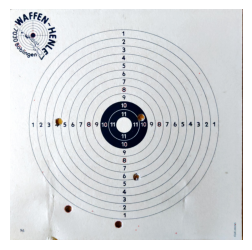

In [ ]:
image2 = io.imread('resources/aligned/shot_1.jpg')
image = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
# Set our filtering parameters
# Initialize parameter setting using cv2.SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()
  
# Set Area filtering parameters
params.filterByArea = True
params.minArea = 30
  
# Set Circularity filtering parameters
params.filterByCircularity = True 
params.minCircularity = 0.7
  
# Set Convexity filtering parameters
params.filterByConvexity = True
params.minConvexity = 0.2
      
# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01
  
# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)
      
# Detect blobs
keypoints = detector.detect(image)
  
# Draw blobs on our image as red circles
blank = np.zeros((1, 1))
blobs = cv2.drawKeypoints(image2, keypoints, blank, (255, 0, 0),
                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  
number_of_blobs = len(keypoints)
print("Number of Circular Blobs: " + str(len(keypoints)))
  
# Show blobs
show_image(blobs)

In [ ]:
image = io.imread('resources/aligned/shot_1.jpg')
#image = cv2.resize(image, (0, 0), fx=0.35, fy=0.35)
#show_image(image)
image.shape
hole1 = io.imread('resources/holes/Loch1.jpg')
hole1_temp = cv2.cvtColor(hole1, cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kernel = np.array([
          [0,1,1,1,0],
          [1,1,1,1,1],
          [1,1,1,1,1],
          [1,1,1,1,0],
          [0,1,1,1,0]],dtype=np.uint8)
#kernel = np.ones((5, 5), np.uint8)
image_image = image
hole1_image = hole1_temp




ret,thresh = cv2.threshold(image,127,255,0)
im2,contours,hierarchy = cv2.findContours(thresh, 1, 2)
for x in range(1):
    image = cv2.erode(image, kernel)
    image_image = cv2.erode(image_image, kernel)
for x in range(1):
    image = cv2.dilate(image, kernel)
    image_image = cv2.dilate(image_image, kernel)


show_image(image,cmap='gray')
show_image(hole1_temp,cmap='gray')
show_image(hole1_image,cmap='gray')



ValueError: not enough values to unpack (expected 3, got 2)

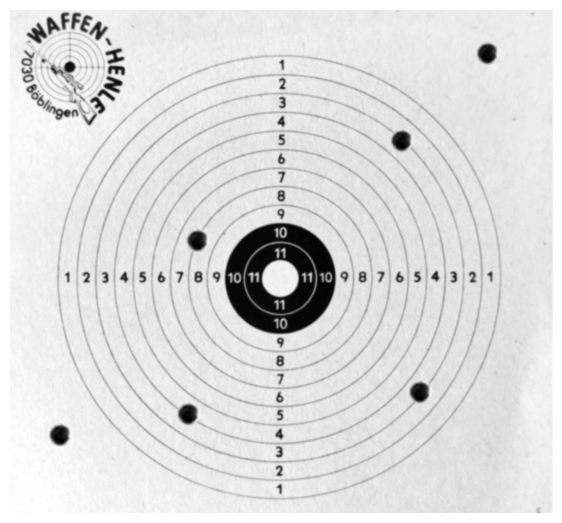

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernel = np.ones((5, 5), np.uint8)
#gray_image = cv2.erode(gray_image, kernel)
gray_image = cv2.GaussianBlur(gray_image, (15,15), 0)
# gray_image = cv2.bitwise_not(gray_image)
# gray_image = cv2.resize(gray_image, (0, 0), fx=0.35, fy=0.35)
show_image(gray_image, cmap='gray', size=(7,7))

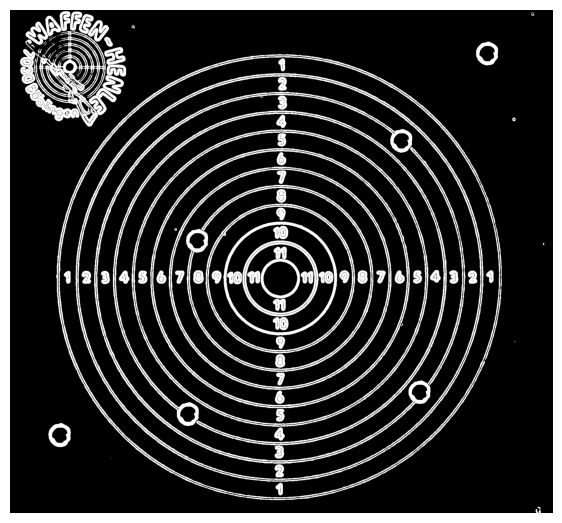

In [ ]:
# canny = cv2.Canny(image=gray_image, threshold1=35, threshold2=200)

sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)

# Normalize and threshold the result
sobel = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
threshold = 40
sobel[sobel < threshold] = 0
sobel[sobel >= threshold] = 255
canny = sobel
# canny = io.imread('resources/aligned/test.png')
# canny = cv2.cvtColor(canny, cv2.COLOR_BGR2GRAY)
show_image(canny, cmap='gray', size=(7,7))

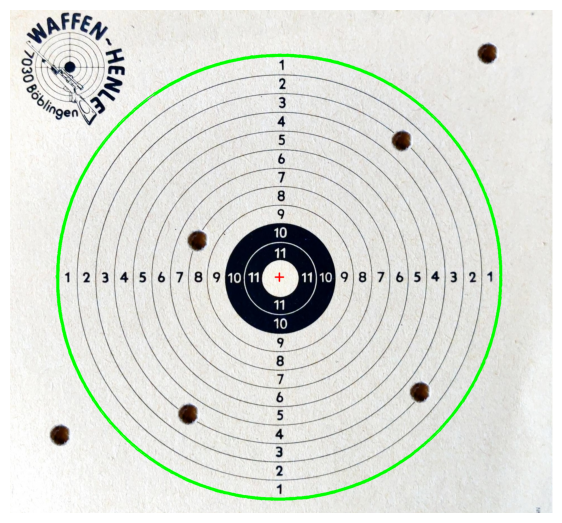

In [ ]:
# find the biggest contour
contours, hierarchy = cv2.findContours(h, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
biggest_cntr = None
biggest_radius = 0
marked = image.copy()
for contour in contours:
    # cv2.drawContours(marked, [contour], -1, (0, 255, 255), 3)
    radius = cv2.minEnclosingCircle(contour)[1]
    area = cv2.contourArea(contour)
    total = area * radius
    if total > biggest_radius:
        biggest_radius = total
        biggest_cntr = contour

cv2.drawContours(marked, [biggest_cntr], -1, (0, 255, 0), 3)

# find center of countour

(centerX, centerY), biggest_radius = cv2.minEnclosingCircle(biggest_cntr)

# convert center position to integers
centerX = int(centerX)
centerY = int(centerY)

cv2.drawMarker(marked, (centerX, centerY), (255, 0, 0), markerType=cv2.MARKER_CROSS, markerSize=30, thickness=3, line_type=cv2.LINE_AA)
show_image(marked, size=(7,7))

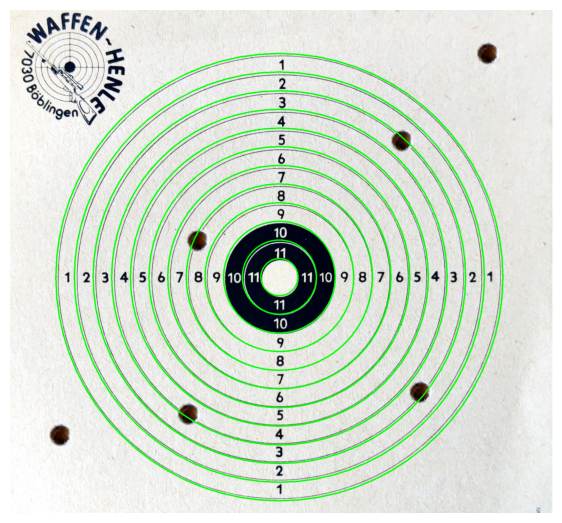

In [ ]:
marked = image.copy()
for i in range(1, 13):
    cv2.circle(marked, (centerX, centerY), int(biggest_radius * i / 12), (0, 255, 0), 3)
show_image(marked, size=(7,7))

In [ ]:
# # find the contours that have a similar center
# marked = image.copy()
# similar_contours = []
# color_index = 0
# # filter contours by center and radius
# for contour in contours:
#     # find center of countour and radius
#     (cX, cY), radius = cv2.minEnclosingCircle(contour)
#     cX = int(cX)
#     cY = int(cY)
    
#     if not(abs(centerX - cX) < 10 and abs(centerY - cY) < 10):
#         continue        
#     if any(abs(radius - similar_contour[1]) < 15 for similar_contour in similar_contours):
#         continue
#     # draw circles
#     cv2.circle(marked, (cX, cY), int(radius), (0,255,0), 3)
#     similar_contours.append(((cX, cY), radius))
# show_image(marked, size=(7,7))

TabError: inconsistent use of tabs and spaces in indentation (890025543.py, line 20)